In [1]:
from netCDF4 import Dataset
import xarray as xr
import numpy as np
import pandas as pd
import pdb

/Users/Casi94/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def process_era(latitud,longitud, time_fin):
    path = '/Users/Casi94/Documents/PhD/Thesis/NN_real/Area_'+latitud+'_'+longitud+'_ERA5/'
    #Data
    sst1 = xr.open_dataset(path+'SST_fldmean.nc')
    slopes = pd.read_csv(path+'Slopes_data_'+latitud+'_'+longitud+'_ERA5.csv')
    TCWV = xr.open_dataset(path+'TCWV_fldmean.nc')
    zonal = xr.open_dataset(path+'Zonalu_fldmean.nc')
    meridional = xr.open_dataset(path+'Meridionalv_fldmean.nc')
    LW_clr = xr.open_dataset(path+'TOP_net_clr_LW_fldmean.nc')
    LW_all = xr.open_dataset(path+'TOP_net_LW_fldmean.nc')
    SW_clr = xr.open_dataset(path+'SFC_net_clr_SW_fldmean.nc')
    SW_all = xr.open_dataset(path+'SFC_net_SW_fldmean.nc')
    EW_all = xr.open_dataset(path+'WVF_EW_fldmean.nc')
    SN_all = xr.open_dataset(path+'WVF_NS_fldmean.nc')
    CA_all = xr.open_dataset(path+'CAPE_fldmean.nc')
    CI_all = xr.open_dataset(path+'CIN_fldmean.nc')
    SP_all = xr.open_dataset(path+'Pressure_fldmean.nc')
    liquid =  xr.open_dataset(path+'Liquid_content_fldmean.nc')
    rain = xr.open_dataset(path+'Rain_content_fldmean.nc')
    ice = xr.open_dataset(path+'Ice_content_fldmean.nc')
    cfrac = xr.open_dataset(path+'Cloud_cover_fldmean.nc')
    lw_up = xr.open_dataset(path+'SFC_upw_LW_fldmean.nc')
    lwc_up = xr.open_dataset(path+'SFC_upw_LWC_fldmean.nc')
    lw_net = xr.open_dataset(path+'SFC_net_LW_fldmean.nc')
    lwc_net = xr.open_dataset(path+'SFC_net_LWC_fldmean.nc')
    airt = xr.open_dataset(path+'air_temp_fldmean.nc')
    sphum = xr.open_dataset(path+'spec_humidity_fldmean.nc')
    ciwp = xr.open_dataset(path+'ciwp_fldmean.nc')
    clwp = xr.open_dataset(path+'clwp_fldmean.nc')
    
    ### Convert to arrays
    sst = np.array(sst1.sst[0:time_fin]).flatten()
    slop = np.array(slopes['Slope'])
    iqr = np.array(slopes['IQR'])
    tcw = np.array(TCWV.tcwv[0:time_fin]).flatten()
    LWc = (np.array(LW_clr.ttrc[0:time_fin]).flatten()/3600)*-1
    LW = (np.array(LW_all.ttr[0:time_fin]).flatten()/3600)*-1
    SWc = np.array(SW_clr.ssrc[0:time_fin]).flatten()/3600
    SW = np.array(SW_all.ssr[0:time_fin]).flatten()/3600
    EW = np.array(EW_all['p71.162'][0:time_fin]).flatten()
    SN = np.array(SN_all['p72.162'][0:time_fin]).flatten()
    CA = np.array(CA_all['cape'][0:time_fin]).flatten()
    CI = np.array(CI_all['cin'][0:time_fin]).flatten()
    SP = np.array(SP_all['sp'][0:time_fin]).flatten()/1000
    LWu = np.array(lw_up.msdwlwrf[0:time_fin]).flatten()
    LWCu = np.array(lwc_up.msdwlwrfcs[0:time_fin]).flatten()
    LWn = np.array(lw_net.msnlwrf[0:time_fin]).flatten()
    LWCn = np.array(lwc_net.msnlwrfcs[0:time_fin]).flatten()
    ciwp = np.array(ciwp.tciw[0:time_fin]).flatten()
    clwp = np.array(clwp.tclw[0:time_fin]).flatten()
    
    ### Here each pressure levels variables
    #ww = np.ones((time_fin,27))
    uu = np.ones((time_fin,27))
    vv = np.ones((time_fin,27))
    ll = np.ones((time_fin,27))
    ii = np.ones((time_fin,27))
    rr = np.ones((time_fin,27))
    cc = np.ones((time_fin,27))
    tt = np.ones((time_fin,27))
    smoi = np.ones((time_fin,27))
    for i in range(np.shape(np.array(meridional.v))[1]):
        if latitud == '1p5S-8p5S' or latitud == '2-5p5' or latitud == '5p5-9':
            #ww[:,i] = np.array(vertical.w[0:time_fin,i])
            uu[:,i] = np.array(zonal.u[0:time_fin,i,0,0])
            vv[:,i] = np.array(meridional.v[0:time_fin,i,0,0])
        else:
            uu[:,i] = np.array(zonal.u[0:time_fin,i])
            vv[:,i] = np.array(meridional.v[0:time_fin,i])
        ll[:,i] = np.array(liquid.clwc[0:time_fin,i,0,0])
        ii[:,i] = np.array(ice.ciwc[0:time_fin,i,0,0])
        rr[:,i] = np.array(rain.crwc[0:time_fin,i,0,0])
        cc[:,i] = np.array(cfrac.cc[0:time_fin,i,0,0])
        tt[:,i] = np.array(airt.t[0:time_fin,i,0,0])
        smoi[:,i] = np.array(sphum.q[0:time_fin,i,0,0])
        
    ### Creating column names
    columna = ['SST','TCWV','LWC','LW','SWC','SW']
    #for i in range(np.shape(np.array(vertical.w))[1]):
    #    columna.append('W'+str(i))
    for i in range(np.shape(np.array(zonal.u))[1]):
        columna.append('U'+str(i))
    for i in range(np.shape(np.array(meridional.v))[1]):
        columna.append('V'+str(i))
    columna.append('WVF U')
    columna.append('WVF V')
    columna.append('CAPE')
    columna.append('CIN')
    columna.append('Press')
    for i in range(np.shape(np.array(meridional.v))[1]):
        columna.append('Cld_L'+str(i))
    for i in range(np.shape(np.array(meridional.v))[1]):
        columna.append('Cld_I'+str(i))
    for i in range(np.shape(np.array(meridional.v))[1]):
        columna.append('Cld_R'+str(i))
    for i in range(np.shape(np.array(meridional.v))[1]):
        columna.append('Cld_C'+str(i))
    columna.append('LWUpw')
    columna.append('LWCUpw')
    columna.append('LWnet')
    columna.append('LWCnet')
    for i in range(np.shape(np.array(meridional.v))[1]):
        columna.append('T'+str(i))
    for i in range(np.shape(np.array(meridional.v))[1]):
        columna.append('SpecQ'+str(i))
    columna.append('ciwp')
    columna.append('clwp')
    
    column_com = ['Dates','IQR']
    
    ### Create DataFrames and Write the file! 
    for col in columna:
        column_com.append(col)

    complete = pd.DataFrame(np.column_stack((slopes['Dates'][0:35040],iqr,sst,
                                             tcw,LWc,LW,SWc,SW,uu,vv,EW,SN,CA,
                                             CI,SP,ll,ii,rr,cc,LWu,LWCu,LWn,LWCn,
                                             tt,smoi,ciwp,clwp))
                            ,columns = column_com)
    complete.to_csv(path+'Complete_met_data.csv', index=False)

    slopes_t = pd.DataFrame(np.column_stack((slopes['Dates'][0:35040],slop)), columns=['Dates', 'Slope'])
    slopes_t.to_csv(path+'Slopes_data_ERA5.csv', index = False)
    return(slopes,complete)

In [3]:
latitud = '2-9' # 2-9 3-10 3S-4N 1p5S-8p5S 
longitud = '135-145' # 135-145 147-157 156-166 163-173
time_fin = 35040 
lats = ['2-9','3-10','3S-4N','1p5S-8p5S']
lons = ['135-145','147-157','156-166','163-173']

for i,lat in enumerate(lats):
    slopes,complete = process_era(lat, lons[i], time_fin)
    del(slopes);del(complete)

In [4]:
latitud = '2-9'
longitud = '135-145'
path = '/Users/Casi94/Documents/PhD/Thesis/NN_real/Area_'+latitud+'_'+longitud+'_ERA5/'
slop2 = pd.read_csv(path+'Slopes_data_'+latitud+'_'+longitud+'_ERA5.csv')
latitud = '3-10'
longitud = '147-157'
path = '/Users/Casi94/Documents/PhD/Thesis/NN_real/Area_'+latitud+'_'+longitud+'_ERA5/'
slop3 = pd.read_csv(path+'Slopes_data_'+latitud+'_'+longitud+'_ERA5.csv')
latitud = '3S-4N'
longitud = '156-166'
path = '/Users/Casi94/Documents/PhD/Thesis/NN_real/Area_'+latitud+'_'+longitud+'_ERA5/'
slop3s = pd.read_csv(path+'Slopes_data_'+latitud+'_'+longitud+'_ERA5.csv')
latitud = '1p5S-8p5S'
longitud = '163-173'
path = '/Users/Casi94/Documents/PhD/Thesis/NN_real/Area_'+latitud+'_'+longitud+'_ERA5/'
slop1p5s = pd.read_csv(path+'Slopes_data_'+latitud+'_'+longitud+'_ERA5.csv')


In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Slope')

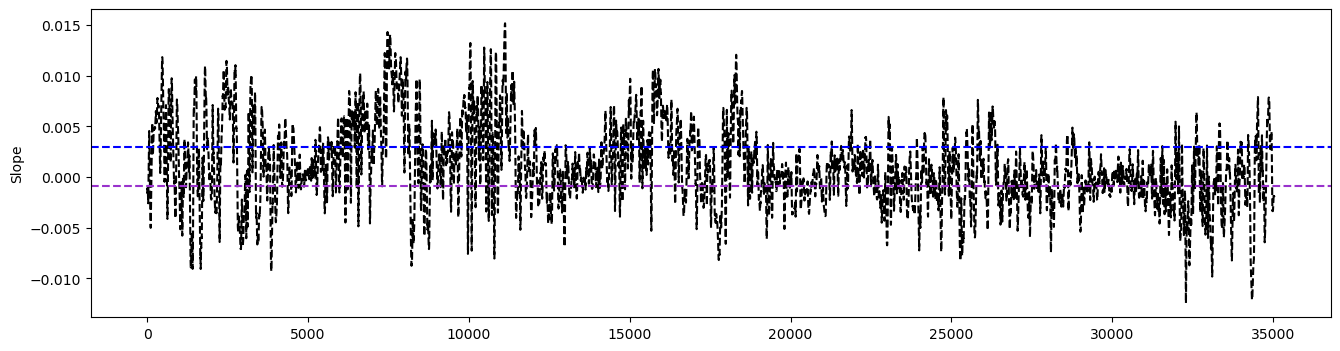

In [6]:
fac = 0.5
slop3s_crit_lo=-fac*slop3s['Slope'].std() # slopes_sd # critical threshold for an event
slop3s_crit_hi=fac*slop3s['Slope'].std() # slopes_sd # critical threshold for an event

plt.figure(figsize=(16,4))
plt.plot(slop3s['Slope'], color = 'k', linestyle = '--')
plt.axhline(slop3s['Slope'].mean()+slop3s_crit_hi, color = 'blue', linestyle='--')
plt.axhline(slop3s['Slope'].mean()+slop3s_crit_lo, color = 'darkorchid', linestyle='--')
plt.ylabel('Slope')


Text(0, 0.5, 'Slope')

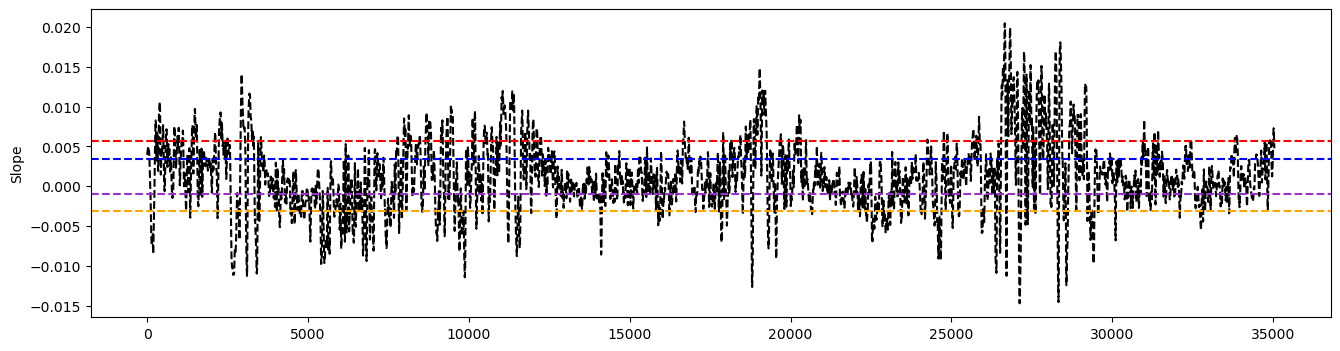

In [7]:
fac = 0.5
slop3s_crit_lo=-fac*slop2['Slope'].std() # slopes_sd # critical threshold for an event
slop3s_crit_hi=fac*slop2['Slope'].std() # slopes_sd # critical threshold for an event

plt.figure(figsize=(16,4))
plt.plot(slop2['Slope'], color = 'k', linestyle = '--')
plt.axhline(slop2['Slope'].mean()+slop3s_crit_hi, color = 'blue', linestyle='--')
plt.axhline(slop2['Slope'].mean()+slop3s_crit_lo, color = 'darkorchid', linestyle='--')
plt.axhline(slop2['Slope'].mean()+slop2['Slope'].std(), color = 'red', linestyle='--')
plt.axhline(slop2['Slope'].mean()-slop2['Slope'].std(), color = 'orange', linestyle='--')

plt.ylabel('Slope')

Text(0, 0.5, 'Slope')

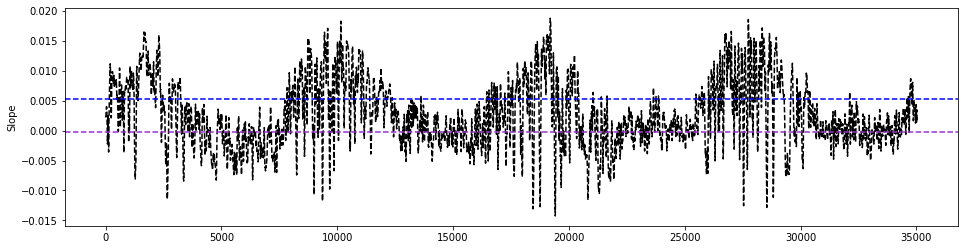

In [8]:
fac = 0.5
slop3s_crit_lo=-fac*slop3['Slope'].std() # slopes_sd # critical threshold for an event
slop3s_crit_hi=fac*slop3['Slope'].std() # slopes_sd # critical threshold for an event

plt.figure(figsize=(16,4))
plt.plot(slop3['Slope'], color = 'k', linestyle = '--')
plt.axhline(slop3['Slope'].mean()+slop3s_crit_hi, color = 'blue', linestyle='--')
plt.axhline(slop3['Slope'].mean()+slop3s_crit_lo, color = 'darkorchid', linestyle='--')
plt.ylabel('Slope')

Text(0, 0.5, 'Slope')

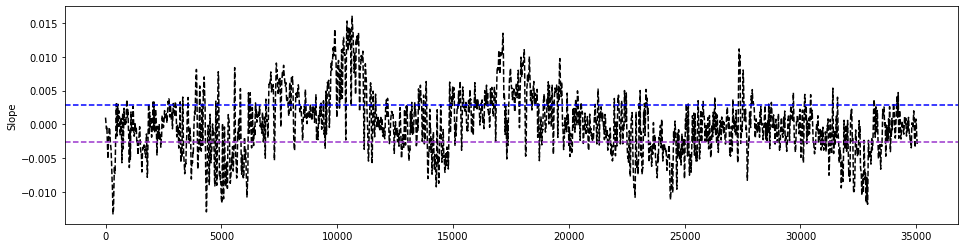

In [9]:
fac = 0.5
slop3s_crit_lo=-fac*slop1p5s['Slope'].std() # slopes_sd # critical threshold for an event
slop3s_crit_hi=fac*slop1p5s['Slope'].std() # slopes_sd # critical threshold for an event

plt.figure(figsize=(16,4))
plt.plot(slop1p5s['Slope'], color = 'k', linestyle = '--')
plt.axhline(slop1p5s['Slope'].mean()+slop3s_crit_hi, color = 'blue', linestyle='--')
plt.axhline(slop1p5s['Slope'].mean()+slop3s_crit_lo, color = 'darkorchid', linestyle='--')
plt.ylabel('Slope')